# 6. Decision Tree

#### Import packages

In [2]:
import os
import numpy as np
import pandas as pd
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline

#### set directories

In [3]:
print(os.getcwd())
dirRawData = "../RawData/"
dirPData = "../PData/"
dirPOutput = "../POutput/"

C:\Users\munch\Documents\Cass MSc\Term 3\Machine Learning\Coursework\PCode


#### Load Data

In [4]:
f_name = dirPData + '02_df.pickle'
with open(f_name, "rb") as f:
    dict_ = pickle.load(f)
    
df_all_onehot = dict_['df_all_onehot']

del f_name, dict_


f_name = dirPData + '02_vars.pickle'
with open(f_name, "rb") as f:
    dict_ = pickle.load(f)
    
vars_ind_num = dict_['vars_ind_num']
var_dep = dict_['var_dep']
vars_ind_categorical = dict_['vars_ind_categorical']
vars_ind_onehot = dict_['vars_ind_onehot']

del f_name, dict_

#### split data into training, validation and test folds

In [5]:
idx_train  = np.where(df_all_onehot['fold'].isin(np.arange(0,8)))[0] #[0,1,2,3,4,5,6,7]
idx_val    = np.where(df_all_onehot['fold'].isin([8,9]))[0] #[8,9]
idx_design = np.where(df_all_onehot['fold'].isin(np.arange(0,10)))[0] #[0,1,2,3,4,5,6,7,8,9]
idx_test = np.where(df_all_onehot['fold'].isin([10]))[0]

In [6]:
vars_ind = vars_ind_num + vars_ind_onehot

In [7]:
x = df_all_onehot[vars_ind].values
y = df_all_onehot[var_dep].values

y_train = y[idx_train]
y_val = y[idx_val]
y_design = y[idx_design]

In [8]:
y_train.shape

(9609, 1)

## Start the Decision Tree

In [9]:
#Standardize the data
from sklearn.preprocessing import StandardScaler

standardScaler_ = StandardScaler()
standardScaler_.fit(x[idx_train])

X_train = standardScaler_.transform(x[idx_train])
X_val   = standardScaler_.transform(x[idx_val])
X_test = standardScaler_.transform(x[idx_test])
X_design = standardScaler_.transform(x[idx_design])

In [10]:
clf = tree.DecisionTreeClassifier(max_depth=6,random_state=2018)

In [11]:
clf.fit(X_train, np.ravel(y_train))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=2018, splitter='best')

In [12]:
pred_train = clf.predict(X_train)
pred_val   = clf.predict(X_val)
pred_test  = clf.predict(X_test)
#they are binary


y_train= y[idx_train].reshape(9609,1)
y_val= y[idx_val].reshape(2353,1)
y_test= y[idx_test].reshape(5121,1)

## Interpretability

In [13]:
#show the how important feathures are
importances = clf.feature_importances_[clf.feature_importances_>0]
importances

array([0.02096021, 0.01163249, 0.01656923, 0.01602356, 0.00548691,
       0.00913669, 0.00909319, 0.03303981, 0.04809276, 0.01212425,
       0.03990693, 0.00596144, 0.0080273 , 0.00873145, 0.0069338 ,
       0.00917596, 0.05468019, 0.00842255, 0.00580306, 0.00785831,
       0.24028457, 0.02060601, 0.0105419 , 0.10123597, 0.0108455 ,
       0.00372236, 0.00816055, 0.0270972 , 0.01657865, 0.00729791,
       0.00789339, 0.07275908, 0.00362691, 0.04705387, 0.04593912,
       0.00717826, 0.00561308, 0.02590555])

In [14]:
#print the varibles'name that are important
print(dict(zip(df_all_onehot[vars_ind].columns, importances)))

{'id': 0.020960205387772164, 'v_num_1': 0.011632494905154823, 'v_num_2': 0.016569228994578206, 'v_num_3': 0.016023562971189204, 'v_num_4': 0.005486914943015481, 'v_num_5': 0.00913669376948922, 'v_num_6': 0.00909318570392023, 'v_num_7': 0.03303981497751674, 'v_num_8': 0.04809276333506209, 'v_num_9': 0.012124247605226969, 'v_num_10': 0.03990692916142454, 'v_num_11': 0.005961441676521127, 'v_num_12': 0.008027304517598508, 'v_num_13': 0.00873145403668609, 'v_num_14': 0.0069338017350154225, 'v_num_15': 0.009175964424008294, 'v_num_16': 0.05468019482067235, 'v_num_17': 0.008422551630199148, 'v_num_18': 0.005803058682843677, 'v_num_19': 0.00785830863301748, 'v_num_20': 0.24028456918347002, 'v_num_21': 0.020606007849906103, 'v_num_22': 0.010541899734963604, 'v_num_23': 0.10123596583441269, 'v_num_24': 0.010845498203696537, 'v_num_25': 0.0037223567209030187, 'v_num_26': 0.008160551272748924, 'v_num_27': 0.027097201240329223, 'v_num_28': 0.016578649910020504, 'v_num_29': 0.007297913484112586, 'v

#### Cross Validation 
train score is 0.9333957747944636
<br>val score is 0.9171270718232044
<br>average score using 10 fold cross validation on design data: 0.9128082888380371
<br>We did not choose a bad fold to fit model

In [15]:
#print accuracy of the training and validation
train_score = clf.score(X_train,y_train)
val_score = clf.score(X_val, y_val)
print("train score is {}".format(train_score))
print("val score is {}".format(val_score))

train score is 0.9333957747944636
val score is 0.9171270718232044


In [16]:
#kfold cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=False)

from sklearn.model_selection import cross_val_score
result = cross_val_score(clf, X_design, np.ravel(y_design), cv=kf, scoring='accuracy')
print("average score using 10 fold cross validation on design data: {}".format(result.mean()))

average score using 10 fold cross validation on design data: 0.9128082888380371


### Performance (auc score)

In [17]:
#print roc_auc_score, which is potentially a better measure
from sklearn.metrics import roc_auc_score
auc_train = roc_auc_score(y_train,pred_train)
auc_val = roc_auc_score(y_val,pred_val)
print("train auc: {}".format(auc_train))
print("val auc: {}".format(auc_val))

train auc: 0.6639975197751207
val auc: 0.6158841366172507


#### looking for the max_depth with highest auc score

In [18]:
#set a range for k parameter
k_range = range(1, 20) 
#variable to store the mean absolute error for each k
auc_k = np.zeros(len(k_range)) #initialisation with 0s
for k in k_range:
    clf = tree.DecisionTreeClassifier(max_depth=k,random_state=2018)
    clf.fit(X_train, y_train) 
    clf_pred_val = clf.predict(X_val)
    auc_k[k - 1] = roc_auc_score(y_val,clf_pred_val)

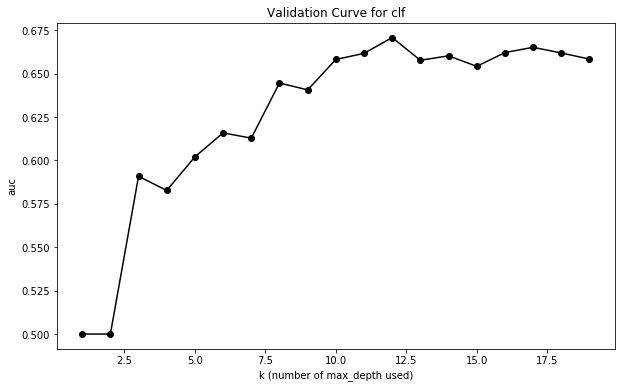

In [19]:
#Plotting the validation curve to see the best k
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(1, 1, 1)

ax1.plot(k_range, auc_k, 'ko-')
ax1.set_xlabel('k (number of max_depth used)')
ax1.set_ylabel('auc')
_ = plt.title('Validation Curve for clf')

# shows max_depth=12 is the best one

In [20]:
#set a range for k parameter
k_range = range(1, 20) 
#variable to store the mean absolute error for each k
auc_k = np.zeros(len(k_range)) #initialisation with 0s
for k in k_range:
    clf = tree.DecisionTreeClassifier(max_depth=k,random_state=2018)
    clf.fit(X_train, y_train) 
    clf_pred_train = clf.predict(X_train)
    auc_k[k - 1] = roc_auc_score(y_train,clf_pred_train)

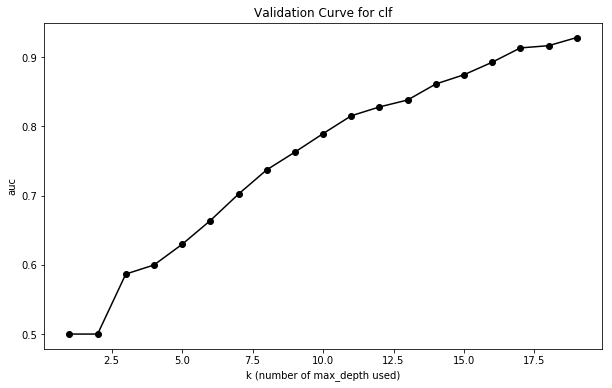

In [21]:
#Plotting the validation curve to see the best k
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(1, 1, 1)

ax1.plot(k_range, auc_k, 'ko-')
ax1.set_xlabel('k (number of max_depth used)')
ax1.set_ylabel('auc')
_ = plt.title('Validation Curve for clf')

howaver, the model with max_depth=12 in kaggle gives us a lower score. Possible reason may come from overfitting or we need to tune parameters more than max_depth.

#### GridSearch to find the best max_depth 

In [22]:
from sklearn.model_selection import GridSearchCV
max_depth=[3,4,5,6,7,8,9,10,11,12]
param_grid=dict(max_depth=max_depth)
clf2= tree.DecisionTreeClassifier(random_state=2018)
grid= GridSearchCV(clf2,param_grid,cv=10,scoring='roc_auc')
grid.fit(X_design,y_design)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
#it shows the max_depth=6  is the best one, so we use this one to fit model 

0.7651039784132685
{'max_depth': 6}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=2018, splitter='best')


In [23]:
grid.fit(X_design,y_design)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=2018,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]},
             pre_dispatch='2*n_jobs', refit=True, return_trai

In [24]:
#change binary to probability
probs = grid.predict_proba(X_test)

In [25]:
decisiontree=probs[:,1]

In [27]:
import csv
f_name = dirPOutput + 'decisiontree2.csv'

df_test = pd.read_csv(dirRawData + 'test.csv')

with open(f_name, 'w',newline='') as csvfile:
    writer=csv.writer(csvfile,delimiter=',')
    writer.writerow(["id", "target"])
    writer.writerows(zip(df_test[df_test.columns[0]], decisiontree))

In [28]:
probs2 = grid.predict_proba(X_design)

In [30]:
dict_ = {'dt_prob_test': probs,
        'dt_prob_design':probs2}

f_name = dirPData + 'dt.pickle'
with open(f_name, "wb") as f:
    pickle.dump(dict_, f)
del f_name